In [53]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from tqdm import tqdm

%matplotlib inline

In [34]:
# load the files
houselist = glob.glob('HousesDataset/*.jpg')

image_data = []
for fname in houselist:
    image_name = fname.split('/')[1].split('.')[0]
    image_data.append((image_name, Image.open(fname)))
    pass

text_data = pd.read_csv('HousesDataset/HousesInfo.txt', sep=' ',
                        names=["nBeds", "nbaths", "area", "zipcode", "price"])

In [91]:
image_same_size = []
for name, image in tqdm(image_data):
    image_same_size.append((name, image.resize((300, 300))))

100%|██████████| 2140/2140 [00:01<00:00, 2076.37it/s]


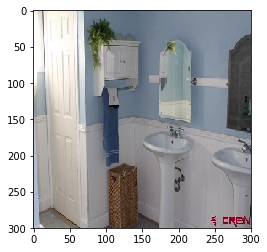

In [95]:
plt.imshow(np.array(image_same_size[0][1]))

In [97]:
X = np.zeros((535, 300, 300, 12)).astype(int)
for name, image in tqdm(image_data):
    index, room = name.split('_')
    if room == "bathroom":
        X[int(index) - 1, :, :, 0:3] = np.array(image.resize((300, 300)))
    elif room == "bedroom":
        X[int(index) - 1, :, :, 3:6] = np.array(image.resize((300, 300)))
    elif room == "frontal":
        X[int(index) - 1, :, :, 6:9] = np.array(image.resize((300, 300)))
    else:
        X[int(index) - 1, :, :, 9:12] = np.array(image.resize((300, 300)))

100%|██████████| 2140/2140 [00:06<00:00, 331.36it/s]


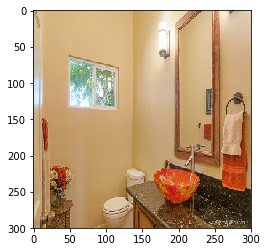

In [102]:
plt.imshow(X[123, :, :, 0:3])